# CDS 503: Machine Learning

***
## Lab 3_Supplementary Materials
### How to do a multiclass classification

***
### Part 1: Input Data

Lets further recapitulate the general shape of a decision tree. We know that we have at the bottom of the tree leaf nodes which contain (in the optimal case) target feature values. To make this more illustrative we use as a practical example a simplified version of the UCI machine learning Zoo Animal Classification dataset (image below for illustration purposes) which includes properties of animals as descriptive features and the and the animal species as target feature. 

<img src="01b.jpg" style="width:60%;margin-left:auto;margin-right:auto;">

The data is freely available here: http://archive.ics.uci.edu/ml/datasets/zoo

The data set is composed of 101 rows of data or examples or instances with total of 18 attributes (or features), where 15 of the attributes representing true (1) and false (0) value. Another three attributes representing a unique animal (`animal_name`) and their leg numbers (`legs`) with its corresponding species (`class`). The attributes are as following:

-  **animal name:** Unique for each instance
-  **hair:** Boolean
-  **feathers:** Boolean
-  **eggs:** Boolean
-  **milk:** Boolean
-  **airborne:** Boolean
-  **aquatic:** Boolean
-  **predator:** Boolean
-  **toothed:** Boolean
-  **backbone:** Boolean
-  **breathes:** Boolean
-  **venomous:** Boolean
-  **fins:** Boolean
-  **legs:** Numeric (set of values: {0,2,4,5,6,8})
-  **tail:** Boolean
-  **domestic:** Boolean
-  **catsize:** Boolean
-  **class:** Numeric (integer values in range of 1 to 7)
    -  1:Mammal
    -  2:Bird
    -  3:Reptile
    -  4:Fish
    -  5:Amphibian
    -  6:Bug
    -  7:Invertebrate

The **classes** and their set of animals:

-  **1** (41 rows): aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

-  **2** (20 rows): chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

-  **3** (5 rows): pitviper, seasnake, slowworm, tortoise, tuatara 

-  **4** (13 rows): bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

-  **5** (4 rows): frog, frog, newt, toad 

-  **6** (8 rows): flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

-  **7** (10 rows): clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import the dataset and define the features
df = pd.read_csv('input/zoo.csv',
                      names=['animal_name','hair','feathers','eggs','milk','airborne','aquatic',
                             'predator','toothed','backbone','breathes','venomous','fins','legs',
                             'tail','domestic','catsize','class',])

# drop the animal names since this is not a good feature to split the data on
df = df.drop('animal_name',axis=1)

df.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


***
### Part 2: Visualizing The Data

While visualizing is made easy using `seaborn` library, it does limits the **ways** to manipulate the visual *aesthetics* of the plot. Nevertheless, the following showed some *examples* of advance plots on the data. Check this link for further exploration using advance plot of seaborn library: https://seaborn.pydata.org/tutorial/distributions.html

<AxesSubplot:>

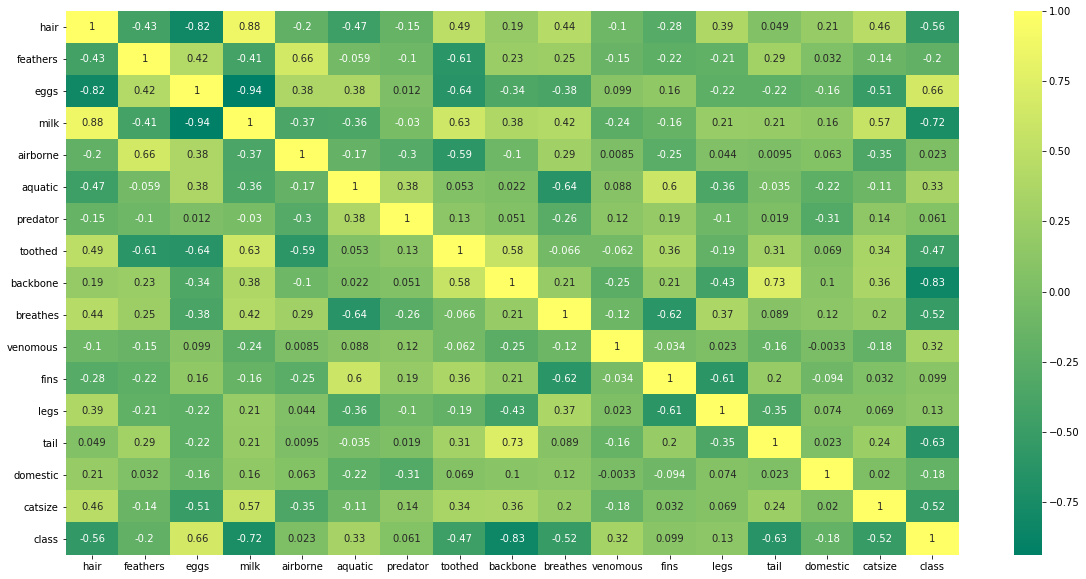

In [2]:
import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')

<AxesSubplot:xlabel='class', ylabel='count'>

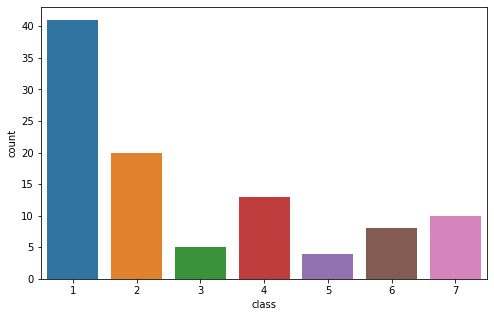

In [3]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="class", data=df)

***
### Part 3: Splitting Data into Training Data and Testing Data

These are two rather important concepts in *data science* and *data analysis* and are used as *tools* to prevent (or at least minimize) **overfitting/underfitting**. For example, using a statistical model like linear regression, we usually fit the model on a training set in order to make predications on a data that wasn’t trained (*general data*). 

**Overfitting** means that we’ve fit the model too much to the training data. This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. **Underfitting** means that we’ve fit the model too little to the training data. This model does not fit the training data and therefore misses the trends in the data.

<img src="fit.png" style="width:60%;margin-left:auto;margin-right:auto;">

It is worth noting the underfitting is not as prevalent as overfitting. These two problems makes the the model cannot be generalized to new data. Nevertheless, we want to avoid both of those problems in data analysis. You might say we are trying to find the middle ground between under and overfitting our model. As you will see, train/test split and cross validation help to avoid overfitting more than underfitting.

As such, the data are separated into the *training* data for modelling and *test* data for validating that model. Since the algorithms are **supervised** learning algorithms, the data *label* (**target class**) and the *data* itself need to be defined.

In [4]:
X = df.iloc[:,:-1] # Select all attributes except the last one (descriptive attributes)
y = df.iloc[:,16] # Classification on animal 'class' (target attribute)
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

***
### Part 4: Classify using Decision Tree

Here, the next **question** directly arises: 

-  Given that we have to *split* the dataset more than one time, that is, ask more then one question to *separate* the dataset, Which is the **descriptive attribute** we should start with (**root node**)? 

-  In which order should we ask questions (build the **interior nodes**) that is, use descriptive attribute to *split* the dataset on?

Well, we have seen that using the `hair` attribute seems to occupy the **most** information about the *target attribute* since we only need this attribute to *perfectly* split the dataset. Hence it would be useful to measure the "informativeness" of the attribute and use the attribute with the most "informativeness" as the attribute to split the data on. From now on, we use the term **information gain** as a measure of "informativeness" of a attribute. How this measure of **information gain** can be further refer to here: https://en.wikipedia.org/wiki/Decision_tree_learning

Therefore we will illustrate this in pictures to make things a little bit more clear (hopefully).

<img src="03.png" style="width:100%;margin-left:auto;margin-right:auto;">

From here, we apply the decision tree model and draw the results output using the `sklearn` confusion matrix. As such, we can justify and determine the *number* of instances being **correctly classified** and **misclassified**.

The prediction accuracy is: 96.77%


Text(0.5, 24.0, 'Predicted label')

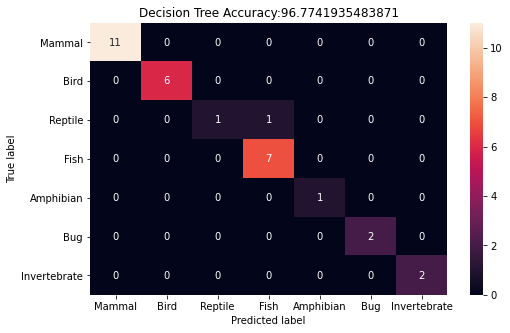

In [5]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate'], 
                     columns = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate'])

# plot the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

***
### Summary

#### Advantages:
-  White box, easy to interpret model
-  No feature normalization needed
-  Tree models can handle both continuous and categorical data (Classification and Regression Trees)
-  Can model nonlinear relationships
-  Can model interactions between the different descriptive features

#### Disadvantages:

-  If continuous features are used the tree may become quite large and hence less interpretable
-  Decision trees are prone to overfit the training data and hence do not well generalize the data if no stopping criteria or improvements like pruning, boosting or bagging are implemented
-  Small changes in the data may lead to a completely different tree. This issue can be addressed by using ensemble methods like bagging, boosting or random forests
-  Unbalanced datasets where some target feature values occur much more frequently than others may lead to biased trees since the frequently occurring feature values are preferred over the less frequently occurring ones. We can address this by ensuring that the dataset is relatively balanced in terms of the target feature values
-  If the number of features is relatively large (high dimensional) and the number of instances is relatively low, the tree might overfit the data
-  Features with many levels may be preferred over features with less levels since for them it is "more easy" to split the dataset such that the sub_datasets only contain pure target feature values. This issue can be addressed by preferring for instance the information gain ratio as splitting criteria over information gain